In [14]:
import numpy as np
from minepy import MINE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'minepy'

In [9]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [10]:
df.head()

,Geographic Area Name,Total!!Estimate!!Households,Median income (dollars)!!Estimate!!Households,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!15 to 24 years,Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!15 to 24 years,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!25 to 44 years,Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!25 to 44 years,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!45 to 64 years,Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!45 to 64 years,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!65 years and over,...,FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,"Abilene, TX",60343,44249,8.9,23489,31.8,50304,34.9,54749,24.4,...,220.478974,192265.733198,15.657754,13.480262,7.577231,4.540864,4.916275,46.172386,100690.0,4.649098e+06
1,"Aguadilla-Isabela, PR",109620,15681,1.9,6603,27.6,16458,39.8,17419,30.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Akron, OH",281752,50776,5.2,19511,30.0,56281,40.9,62220,23.9,...,124.833129,115371.753755,15.995618,12.539551,7.604762,5.563126,6.291286,47.994344,227621.0,1.181086e+07
3,"Albany, GA",58250,36805,4.8,14867,32.8,36729,39.9,45370,22.5,...,45.432009,115472.584515,13.906133,14.077966,7.783972,4.548862,4.895082,45.212014,54985.0,2.485983e+06
4,"Albany, OR",44942,44965,4.9,21652,29.8,50436,38.3,55601,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
y = df['Total County Carbon Footprint (tCO2e/yr)']

In [12]:
cols_to_plot = df.iloc[:, 1:]

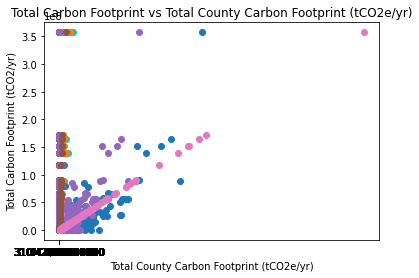

In [6]:
for column in cols_to_plot.columns:
    if column != 'y':
        x = df[column]
        plt.scatter(x, y)
        plt.xlabel(column)
        plt.ylabel('Total Carbon Footprint (tCO2/yr)')
        plt.title('Total Carbon Footprint vs ' + column)
        plt.show()

In [13]:
for column in cols_to_plot.columns:
    if column != 'y':
        x = df[column]
        mic(x, y)

NameError: name 'mic' is not defined